In this project, classification algorithm - Decision Trees- was employed to build a model from the historical data of patients, and their response to different medications. In order to find out which drug might be appropriate for a future patient. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("drug200.csv",delimiter= ",")

In [5]:
df[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.shape 

(200, 6)

In [7]:
X = df[["Age","Sex","BP","Cholesterol","Na_to_K"]].values 
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
from sklearn import preprocessing 

In [9]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [10]:
y= df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=.3, random_state=4)

In [13]:
print("shape of training set",X_train.shape,y_train.shape)
print("shape of testing set", X_test.shape,y_test.shape)

shape of training set (140, 5) (140,)
shape of testing set (60, 5) (60,)


In [14]:
drugtree =DecisionTreeClassifier(criterion="entropy",max_depth =4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
predtree= drugtree.predict(X_test)

In [17]:
print(predtree[0:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


Model Evaluation

In [18]:
from sklearn import metrics
from sklearn.metrics import f1_score

In [19]:
print("Decision Tree's accuracy", metrics.accuracy_score(y_test,predtree))

Decision Tree's accuracy 0.9666666666666667


In [20]:
print("DT F1-score", f1_score(y_test,predtree, average='weighted'))

DT F1-score 0.9653634651600753


Visualization

In [21]:
import matplotlib.pyplot as plt 

In [22]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree 
%matplotlib inline 

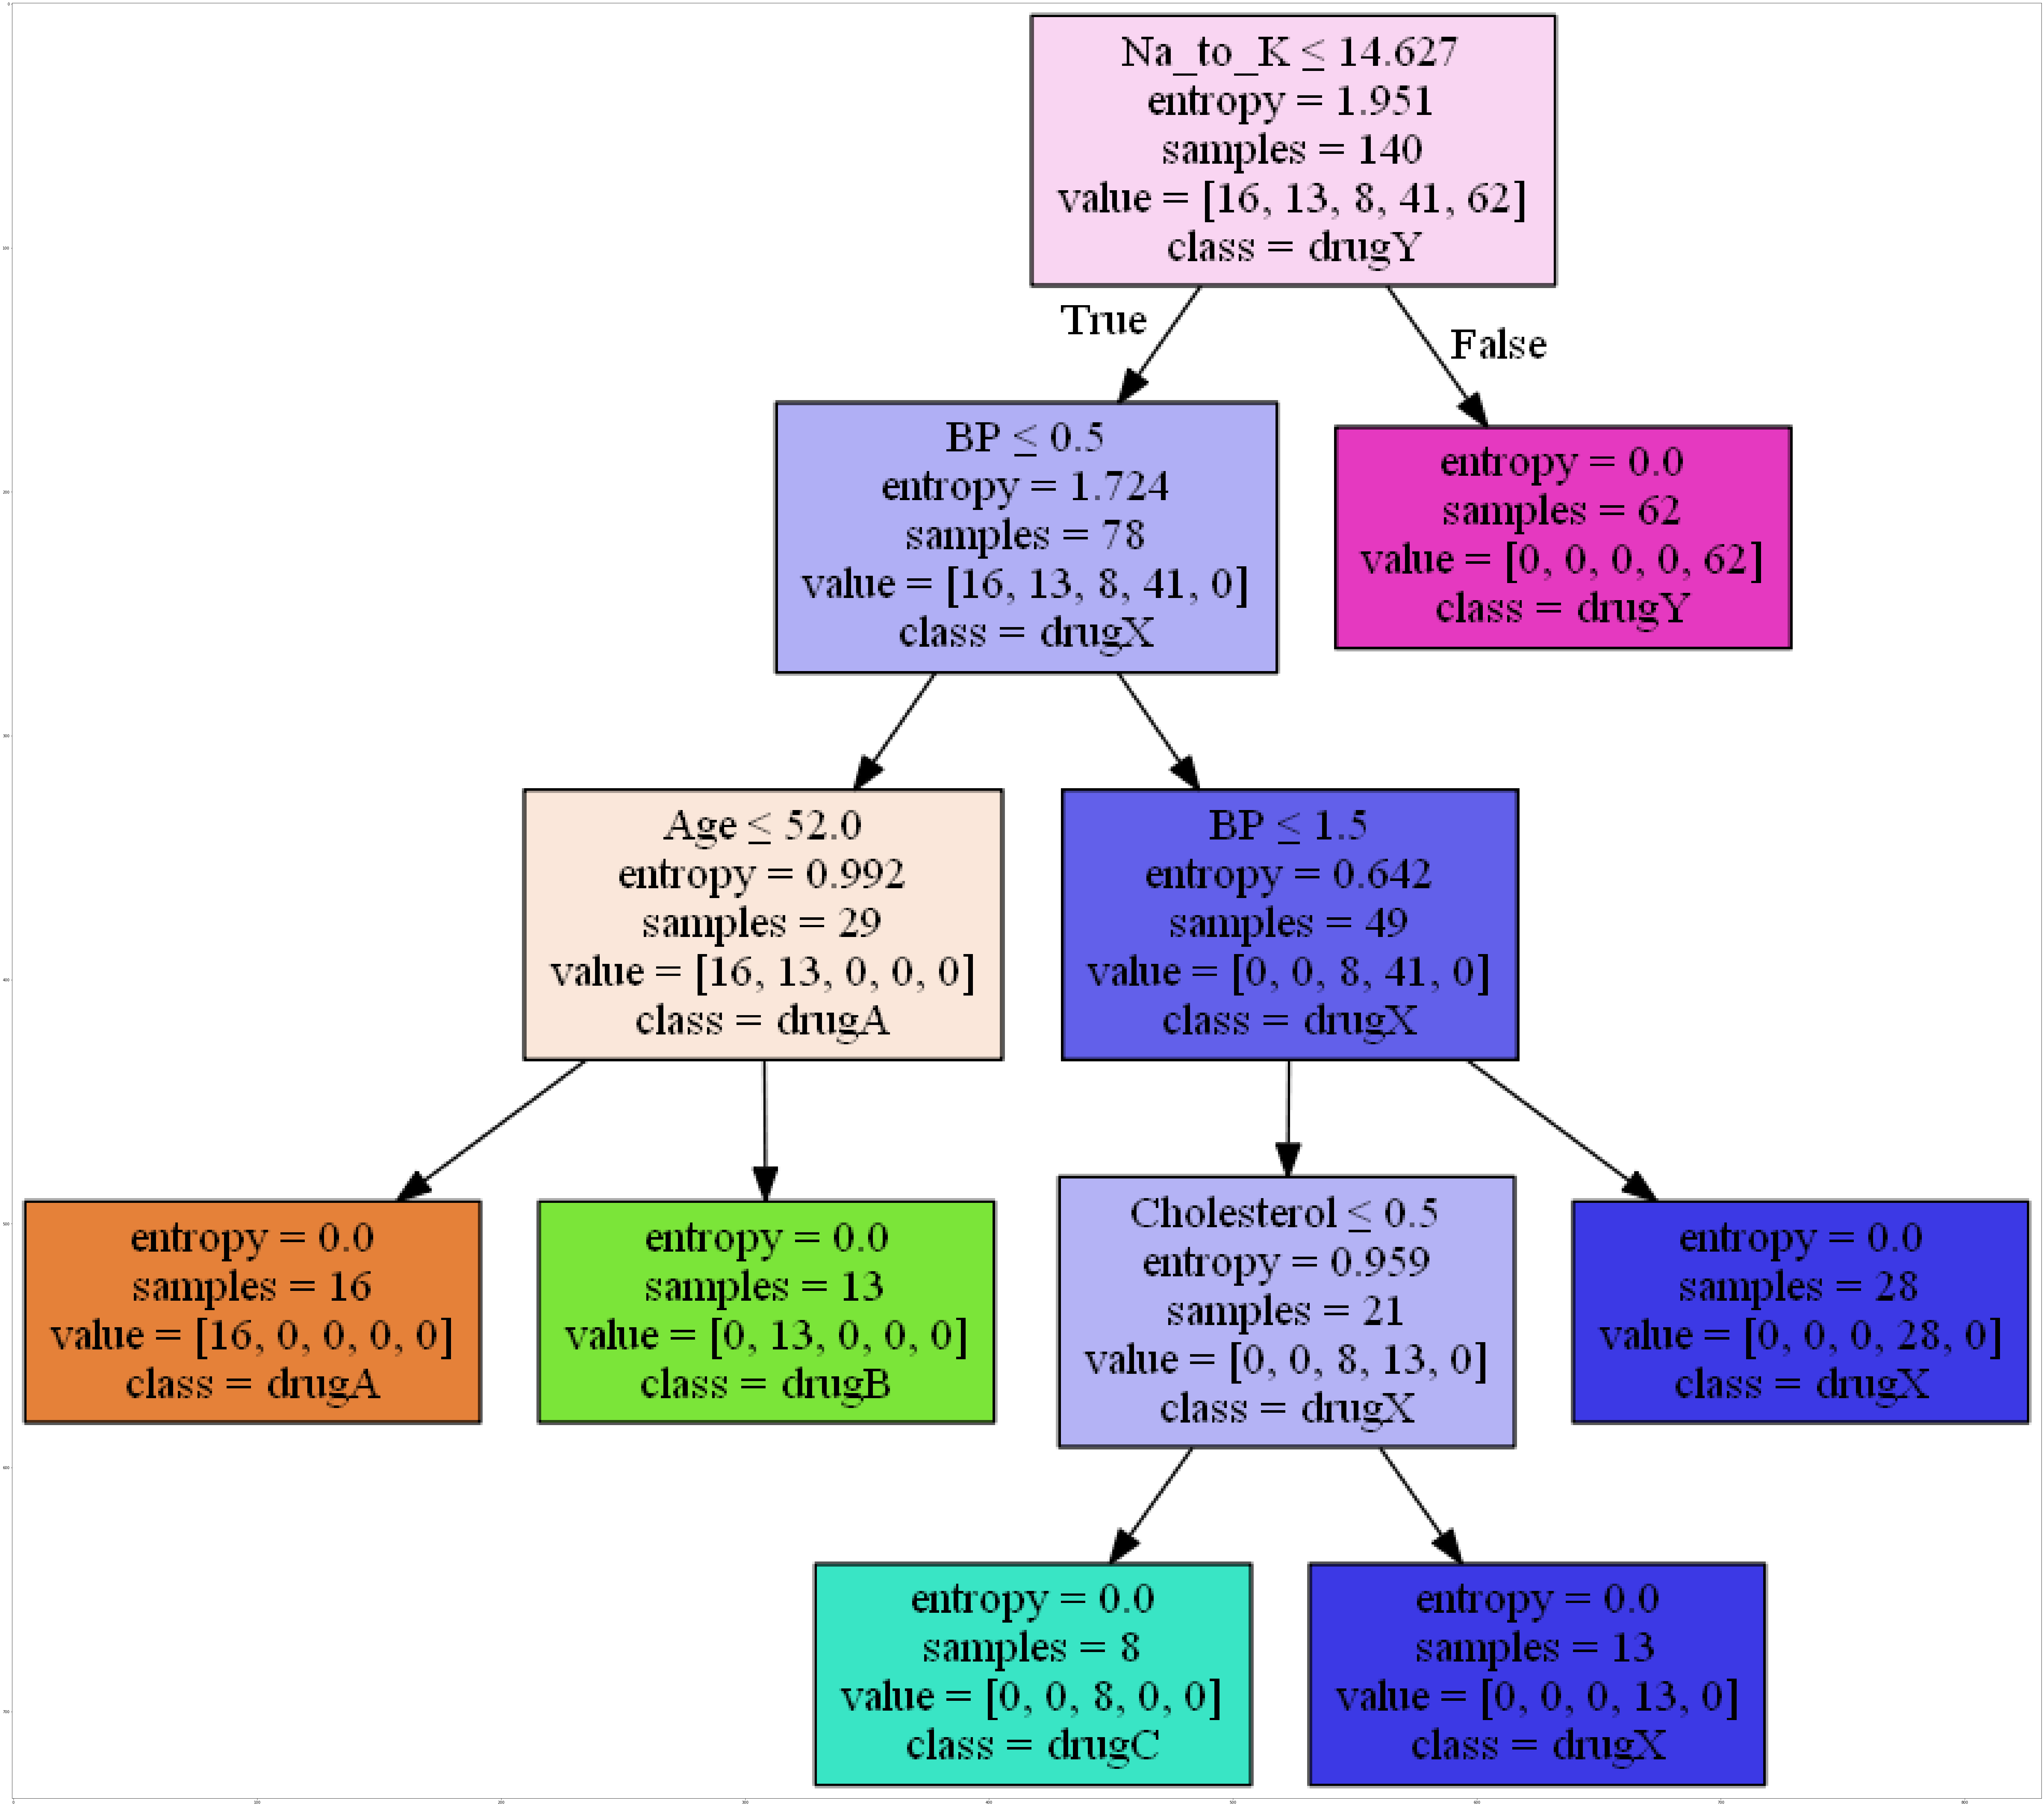

In [23]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(drugtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')